Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
from random import choices
from collections.abc import Callable, Sequence
import numpy as np

import lab9_lib
from population import Population
from population_builder import PopulationBuilder
from island import Island

In [8]:
fitness = lab9_lib.make_problem(1)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

11100010010001101110000100010100101011100111100001: 46.00%
11101111010111000001101101110001101101000101000110: 54.00%
00110001011100111111001010001111011001000100101011: 52.00%
00000110100011011001011101101010011010001111110001: 50.00%
01011001001101000100011011101110100000000101000001: 40.00%
01001011010001111111111101000111011101000100011001: 56.00%
01000011101001111010001111111000110110001111110011: 58.00%
00111001101010101010010001110001011011100100011001: 48.00%
11001100111001000011000111001111111110001010110011: 56.00%
10111011000100100001101100101010101000100001100110: 44.00%
10


In [9]:
def run_population(problem_fitness, generations, builder):
    population = (builder
                  .add_fitness_function(fitness_function=problem_fitness)
                  .build())
    population.run_for_generations_or_until_no_upgrades(generations, log_data=False, n_generations_without_upgrade=100)
    
    print(f"Generations ran {population.generations_ran}")
    print(f"Max fitness {population.max_fitness}")
    print(f"Fitness call {problem_fitness.calls / 1000}k")
    population.log_history_fitness()

# Population
Thanks, to the population builder, we can easily build a population, in this case after many test we develop this population that perform discretely in all problem( we the problem of premature convergence in the problems 5 and 10). 
Be aware that there are not Individual class but only a Population, so that every function applied to it is made with numpy function and not even a single for loop is present( this dramatically increase speed but reduce code readability). 

In [10]:
#Population builder
builder = (PopulationBuilder()
           .initialize_random(population_size=100, genome_len=1000)
           .add_parents_selector_tournament(tournament_size=10, offspring_size=150)
           .add_survivals_selector_generational()
           .set_recombination_and_mutation_mutualexclusive(probability_recombination_over_mutation=.2)
           .add_mutation_single_flip()
           .add_recombination_uniform_xover())

Generations ran 631
Max fitness 1.0
Fitness call 94.75k


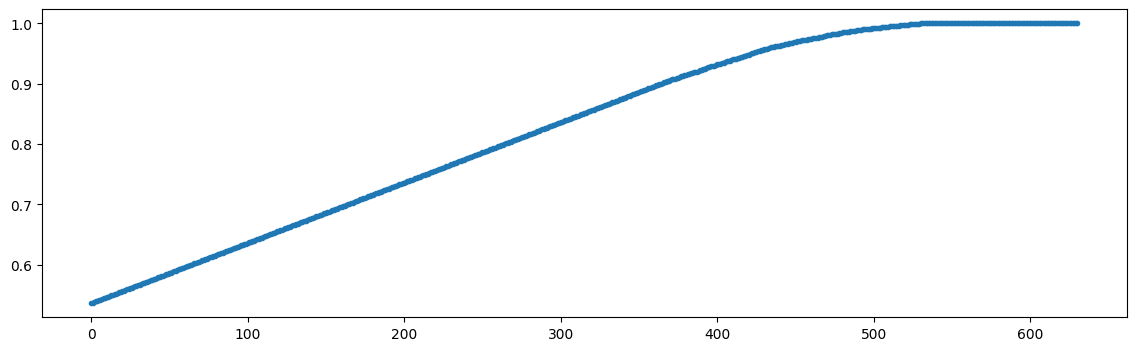

In [11]:
run_population(lab9_lib.make_problem(1), 1500, builder)

Generations ran 1500
Max fitness 0.95
Fitness call 225.1k


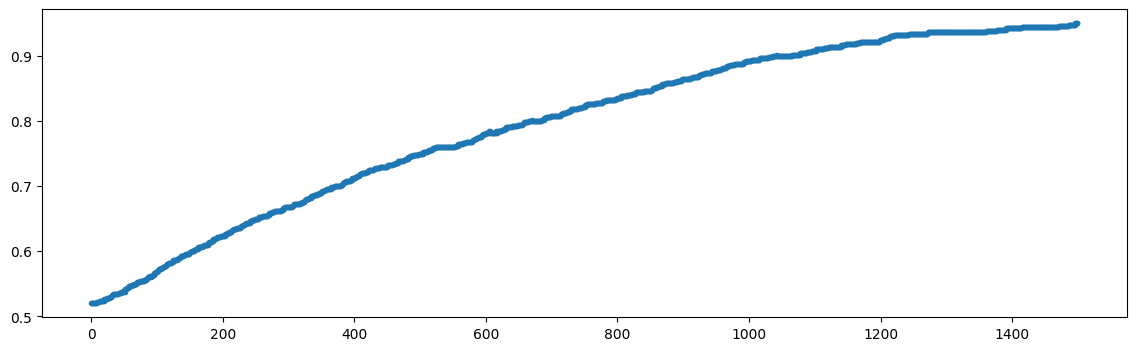

In [14]:
run_population(lab9_lib.make_problem(2), 1500, builder)

Generations ran 366
Max fitness 0.318
Fitness call 55.0k


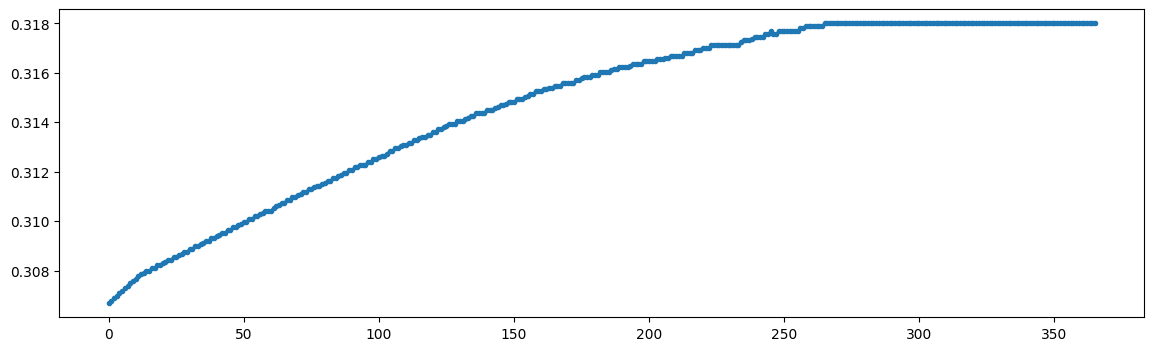

In [26]:
run_population(lab9_lib.make_problem(5), 1500, builder)

Generations ran 393
Max fitness 0.318
Fitness call 59.05k


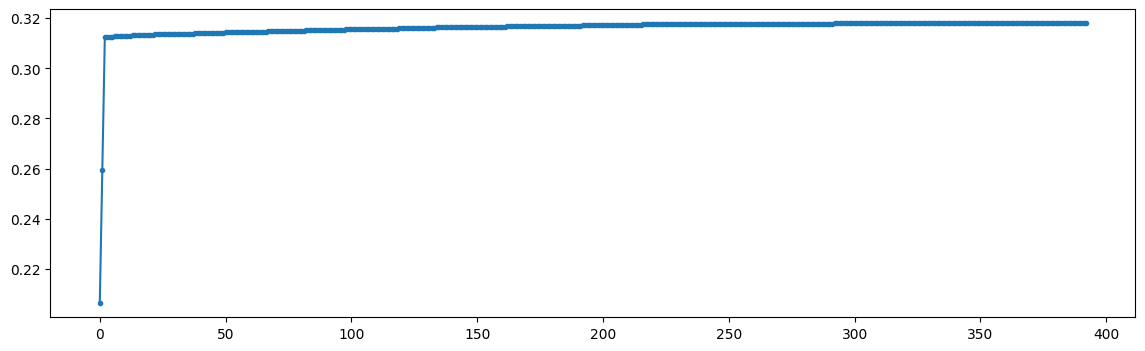

In [20]:
run_population(lab9_lib.make_problem(10), 1500, builder)

# Islands
We have developed a solution base on island to try to mitigate the previous problem. 

In [3]:
def run_island(population_size, genome_len, epoch, problem_fitness, builders ):
    builders = [b.add_fitness_function(fitness_function=problem_fitness) for b in builders]
    island = Island(population_size, genome_len, builders)
    
    island.run(epochs=epoch)
    print(f"Max fitness {island.max_fitness}")
    print(f"Fitness call {problem_fitness.calls / 1000}k")
    island.log_history_fitness()

In [4]:
population_size = 50
genome_len = 1000
problem_fitness = lab9_lib.make_problem(2)

builders =[ (PopulationBuilder()
            .add_parents_selector_tournament(tournament_size=10, offspring_size=70)
            .add_survivals_selector_generational()
            .add_recombination_uniform_xover()
            .add_mutation_single_flip()
            .set_recombination_and_mutation_mutualexclusive(probability_recombination_over_mutation=0.2)),
            (PopulationBuilder()
            .add_parents_selector_tournament(tournament_size=2, offspring_size=70)
            .add_survivals_selector_generational()
            .add_recombination_one_point_xover()
            .add_mutation_single_flip()
            .set_recombination_and_mutation_mutualexclusive(probability_recombination_over_mutation=0.7)),
            (PopulationBuilder()
            .add_parents_selector_tournament(tournament_size=10, offspring_size=30)
            .add_survivals_selector_steady_state()
            .add_recombination_one_point_xover()
            .add_mutation_single_flip()
            .set_mutation_sequential_to_recombination(probability_mutation=0.3))]

Max fitness 1.0
Fitness call 102.91k


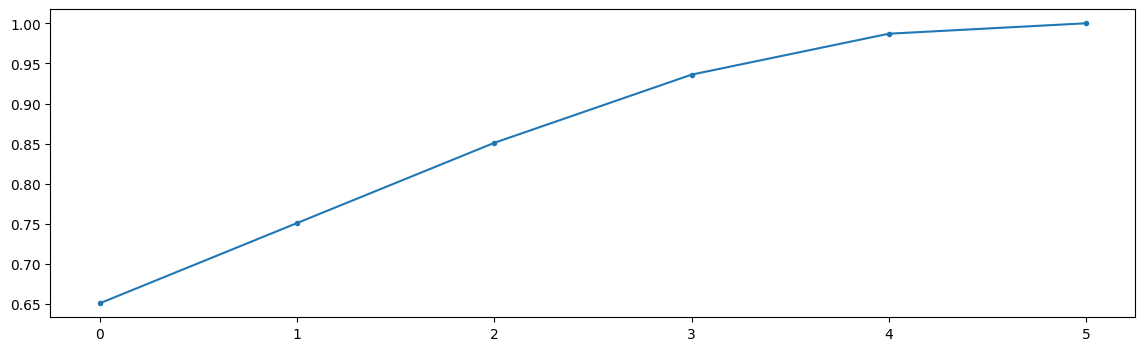

In [16]:
run_island(population_size, genome_len, 6, lab9_lib.make_problem(1), builders)

Max fitness 0.918
Fitness call 167.4k


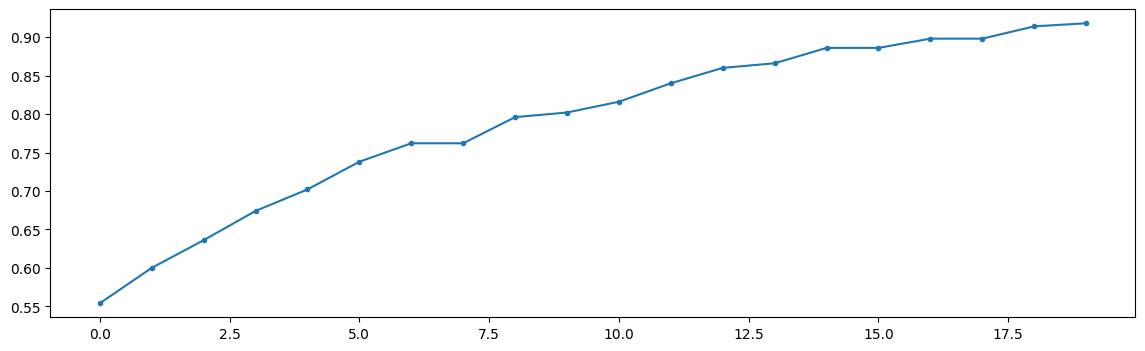

In [17]:
run_island(population_size, genome_len, 20, lab9_lib.make_problem(2), builders)

Max fitness 0.324
Fitness call 115.43k


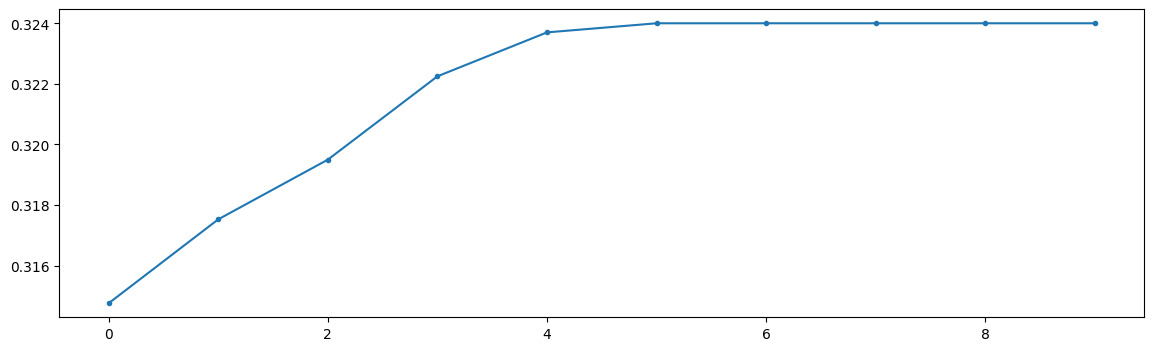

In [10]:
run_island(population_size, genome_len, 10, lab9_lib.make_problem(5), builders)

Max fitness 0.22
Fitness call 117.79k


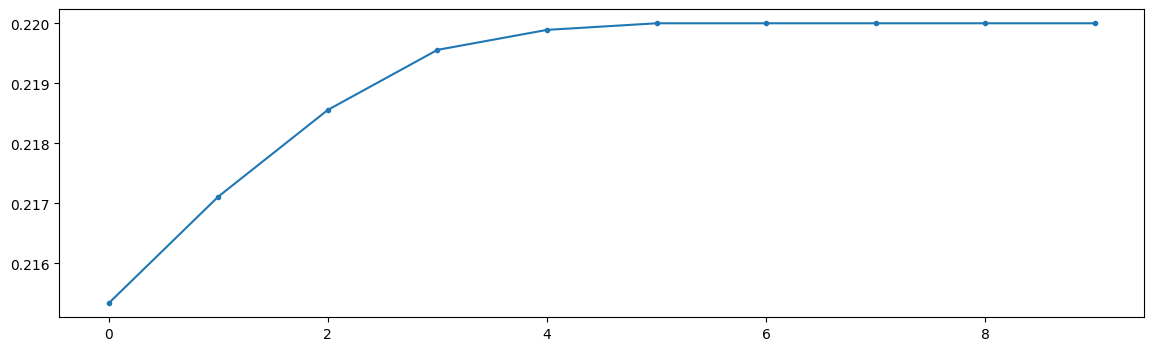

In [14]:
run_island(population_size, genome_len, 10, lab9_lib.make_problem(10), builders)